### Информация
- *Автор*: Зитцер Данил
- *Дата*: среда, 6 октября 2021 г., 10:31:49
- *Описание*: Введение в МО и библиотеку scikit-learn

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings

from IPython.display import YouTubeVideo

plt.rcParams['figure.figsize'] = (18, 9)
plt.rcParams['font.size'] = 20

warnings.filterwarnings('ignore')

## Машинное обучение

![](./../images/01-ai-ml-dl.png)

![](./../images/02-ml-categories.png)

### Обучение с учителем (регрессия)

![](./../images/03-forecasting.png)

### Обучение без учителя (кластеризация)

![](./../images/04-clustering.png)

### Обучение с подкреплением (Game AI)

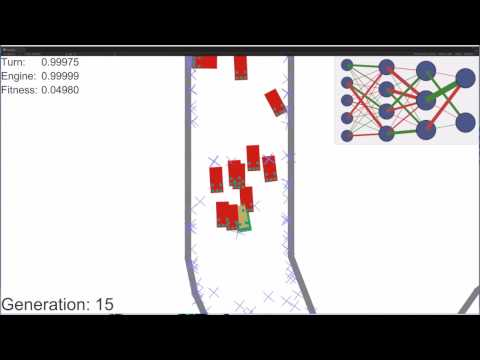

In [2]:
YouTubeVideo('Aut32pR5PQA', width=800, height=300)

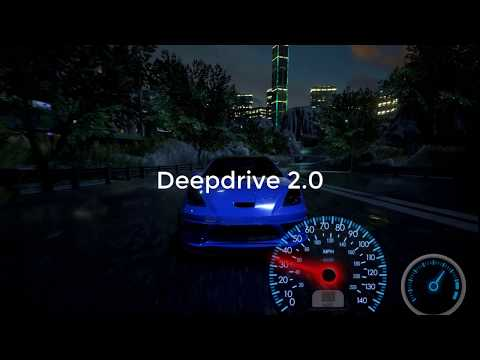

In [3]:
YouTubeVideo('p4DbNFkQU78', width=800, height=300)

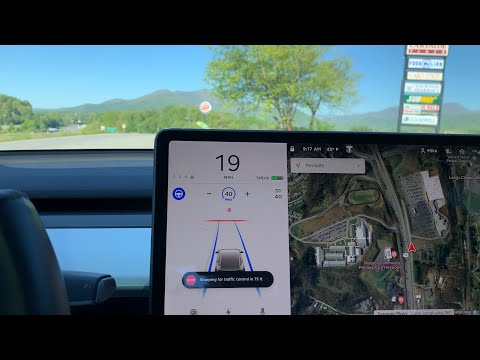

In [4]:
YouTubeVideo('jheBCOpE9ws', width=800, height=300)

## [Scikit-learn](https://scikit-learn.org/)

![](./../images/07-sklearn-cheat-sheet.png)

### Iris dataset (Ирисы Фишера)

![](./../images/05-iris-examples.png)

### Загрузка набора данных

In [5]:
from sklearn.datasets import load_iris

In [6]:
x, y = load_iris(return_X_y=True, as_frame=True)

In [7]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

### Названия классов

In [9]:
from enum import IntEnum

In [10]:
class Iris(IntEnum):
    Setosa = 0
    Versicolour = 1
    Virginica = 2

### Визуализируем набор данных

По ширине и длине чашелистика:

Text(0, 0.5, 'sepal width (cm)')

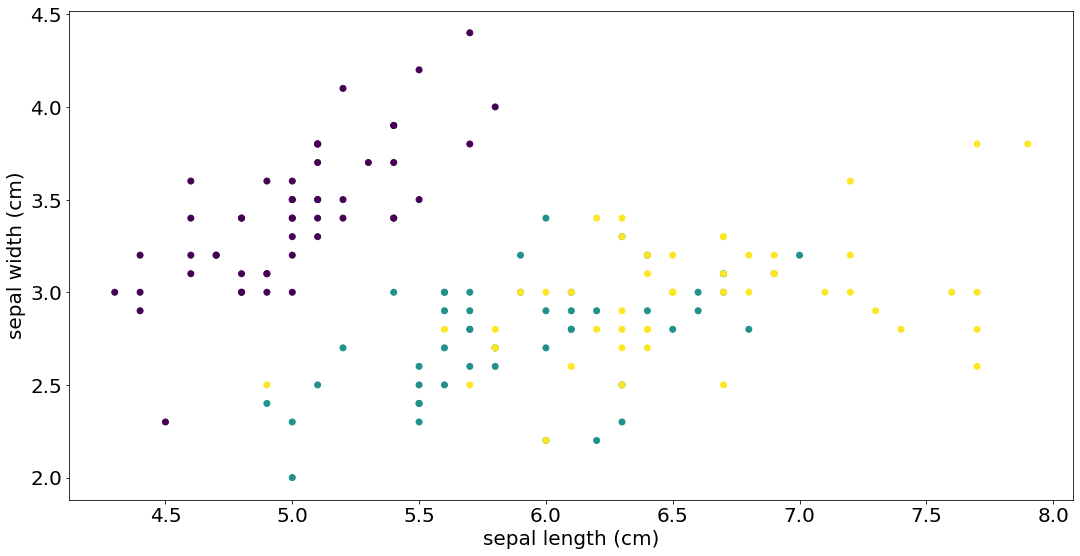

In [11]:
plt.scatter(
    x=x['sepal length (cm)'],
    y=x['sepal width (cm)'],
    c=y,
)

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

По длине и ширине лепестка:

Text(0, 0.5, 'petal width (cm)')

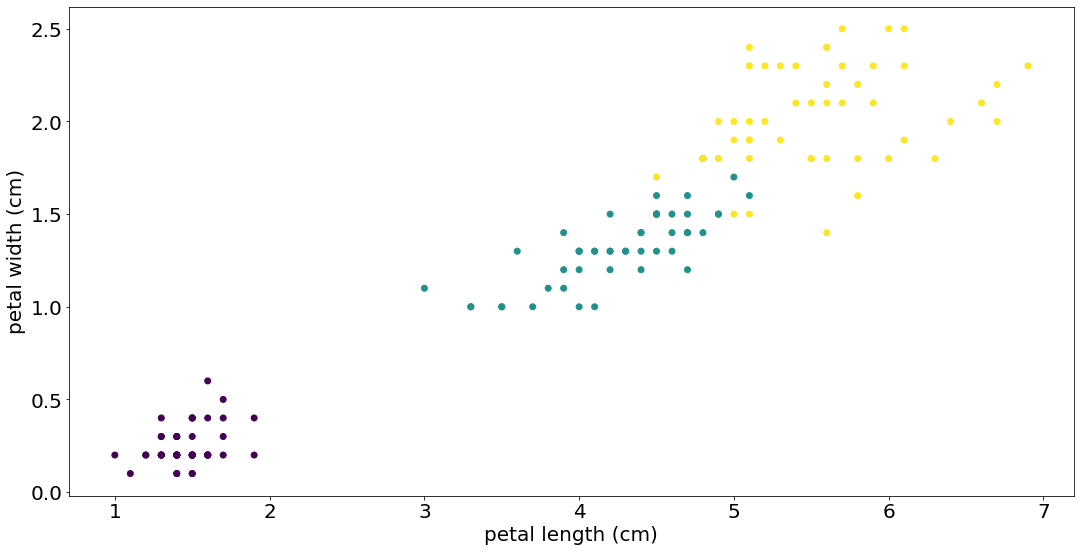

In [12]:
plt.scatter(
    x=x['petal length (cm)'],
    y=x['petal width (cm)'],
    c=y,
)

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

### Распределение каждого из признаков по классам

In [13]:
import pandas as pd

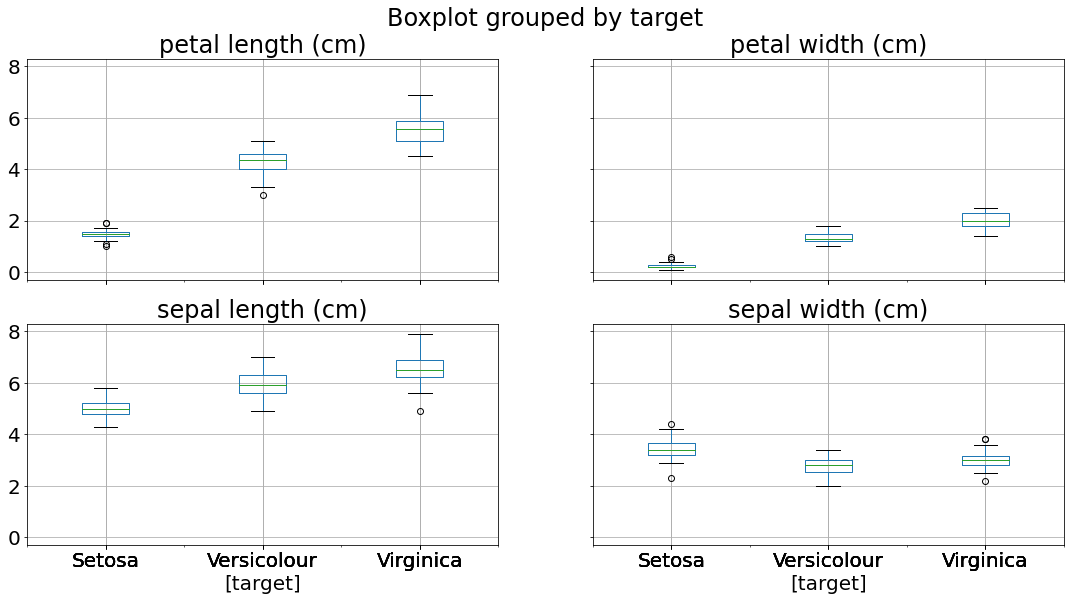

In [14]:
_ = pd.concat([x, y.replace({x.value: x.name for x in Iris})], axis=1).boxplot(by='target')

### Обучающий и тестовый набор данных

Размерность наших предикторов и отклика:

In [15]:
print(x.shape)
print(y.shape)

(150, 4)
(150,)


Баланс классов:

In [16]:
y.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

![](./../images/06-train-test-split.png)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_trn, x_tst, y_trn, y_tst = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

Размерноси после разбиения:

In [19]:
print(x_trn.shape, x_tst.shape)
print(y_trn.shape, y_tst.shape)

(105, 4) (45, 4)
(105,) (45,)


Баланс классов после разбиения:

In [20]:
print(y_trn.value_counts())
print(y_tst.value_counts())

1    35
0    35
2    35
Name: target, dtype: int64
2    15
1    15
0    15
Name: target, dtype: int64


### Обучение модели
[Сравнение классификаторов из библиотеки Scikit-learn](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

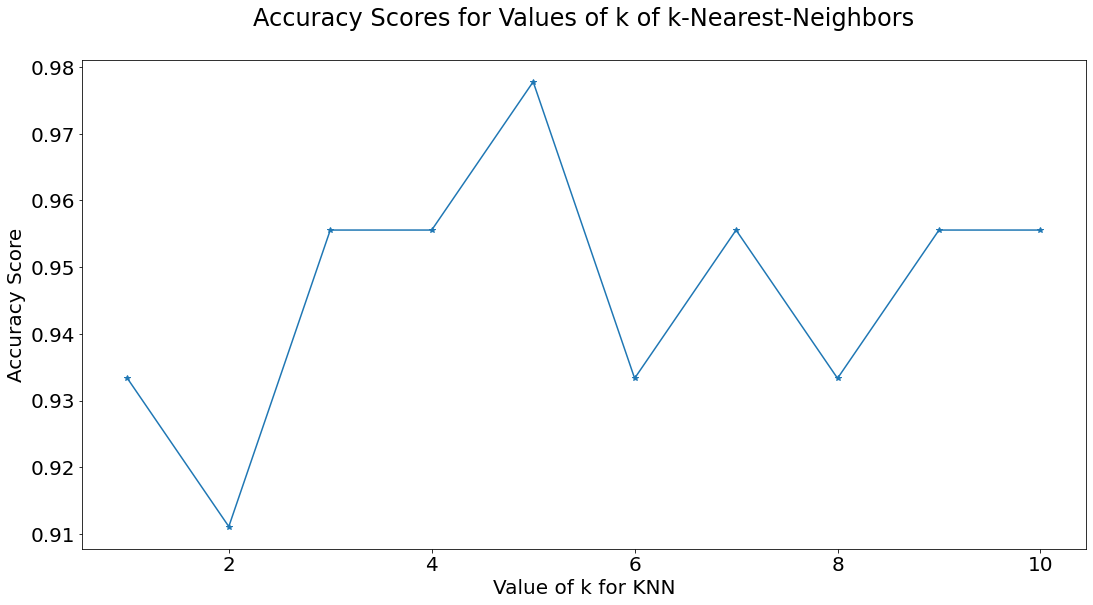

In [22]:
k_range = list(range(1, 11))
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_trn, y_trn)
    
    scores.append(accuracy_score(y_tst, knn.predict(x_tst)))
    
plt.plot(k_range, scores, '-*')

plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
_ = plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors\n')